### Programming Assignment 2 
# **Linear Regression**

AJ Dave A. Obis and Juan Francis C. Tuatis

In [49]:
# Import Libraries to be used
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Import the dataset to be used
eed_pd = pd.read_excel(r'C:\Users\Dell\Documents\TUP_Files\SUBJECTS\Emtech Lab\Programming Assignment 2\ENB2012_data.xlsx', engine = 'openpyxl')

# Rename the columns 
eed_pd.rename(columns={ 'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace=True)
eed_pd.head()



,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [50]:
# Create another copy for the DataFrame
eed_pd1 = eed_pd.copy()
print(eed_pd1.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

<Figure size 1000x1000 with 0 Axes>

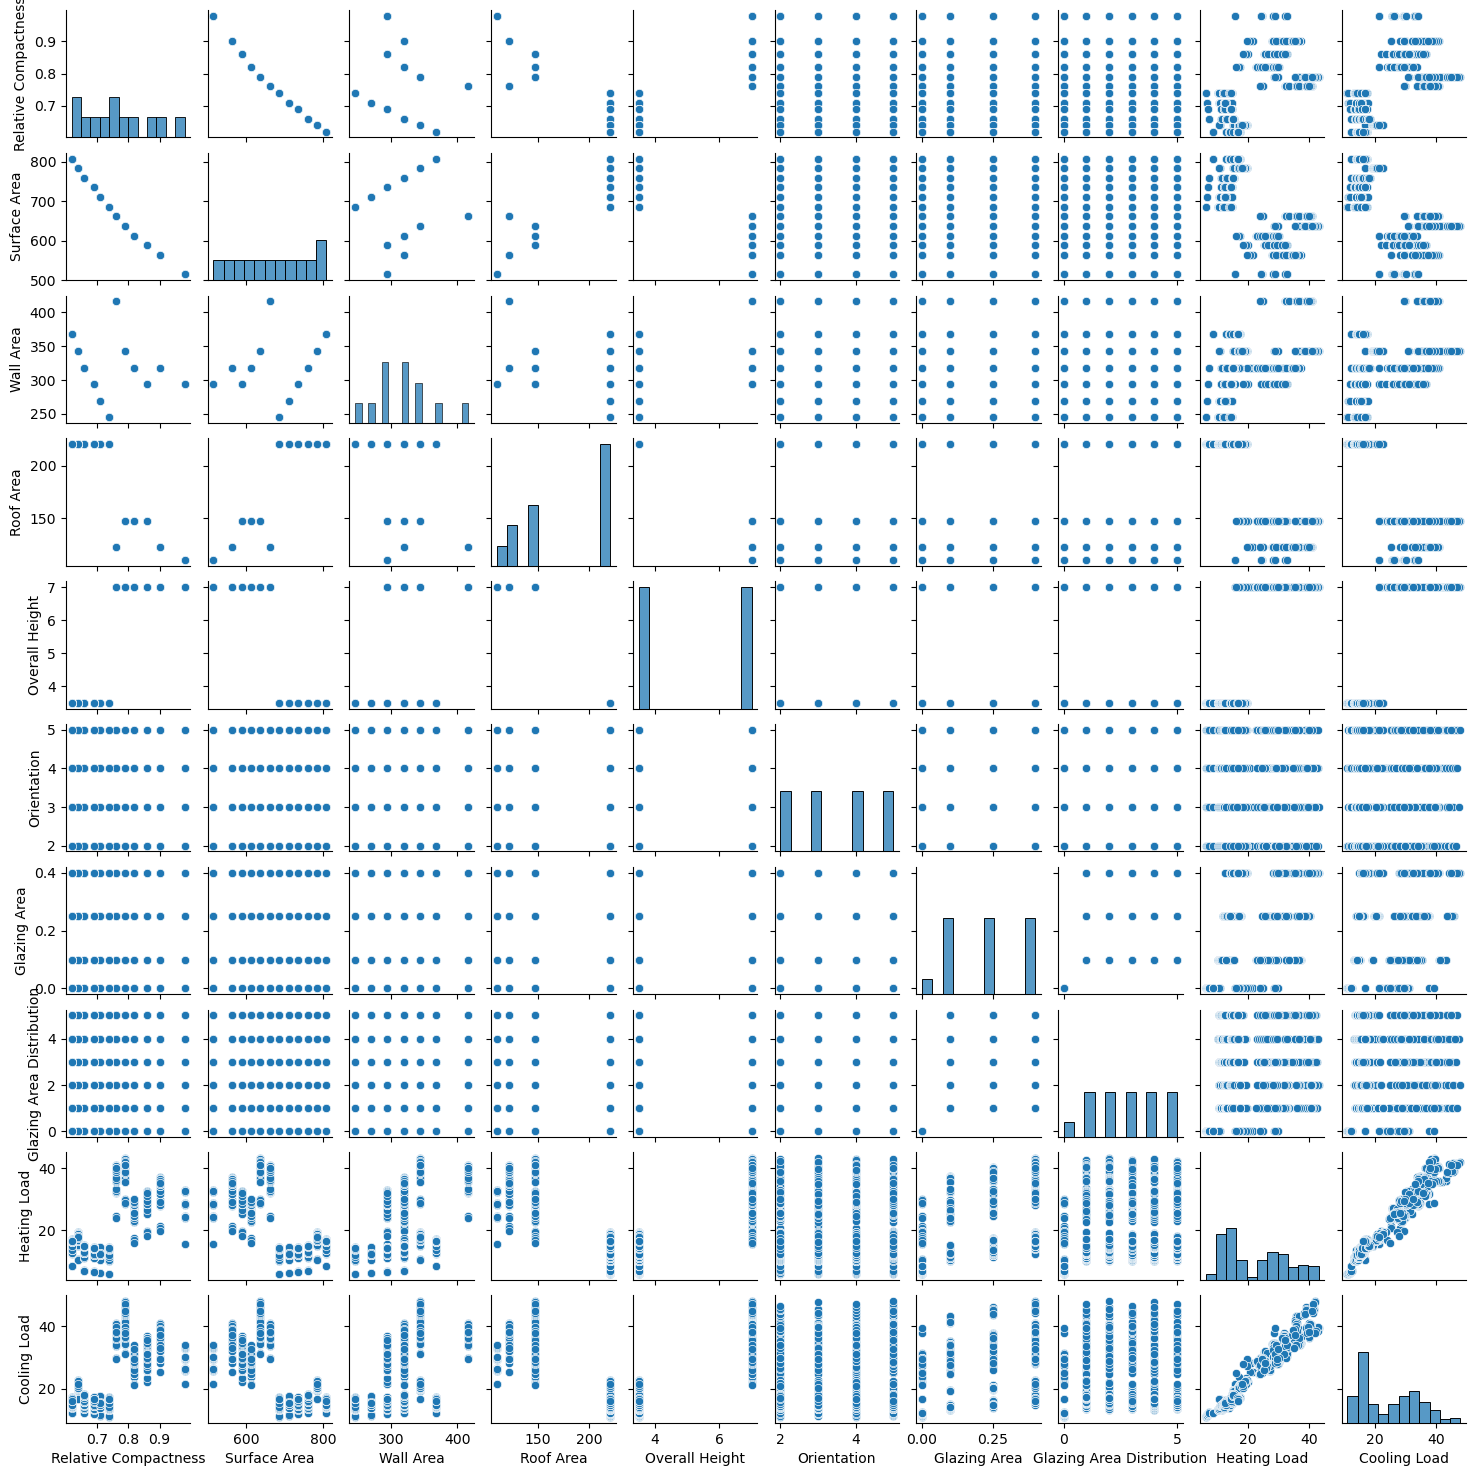

In [51]:
# Generate a pair plot for the Energy Efficiency dataset
plt.figure(figsize=(10, 10))
sns.pairplot(eed_pd, height=1.5)

# Show the plot
plt.show()

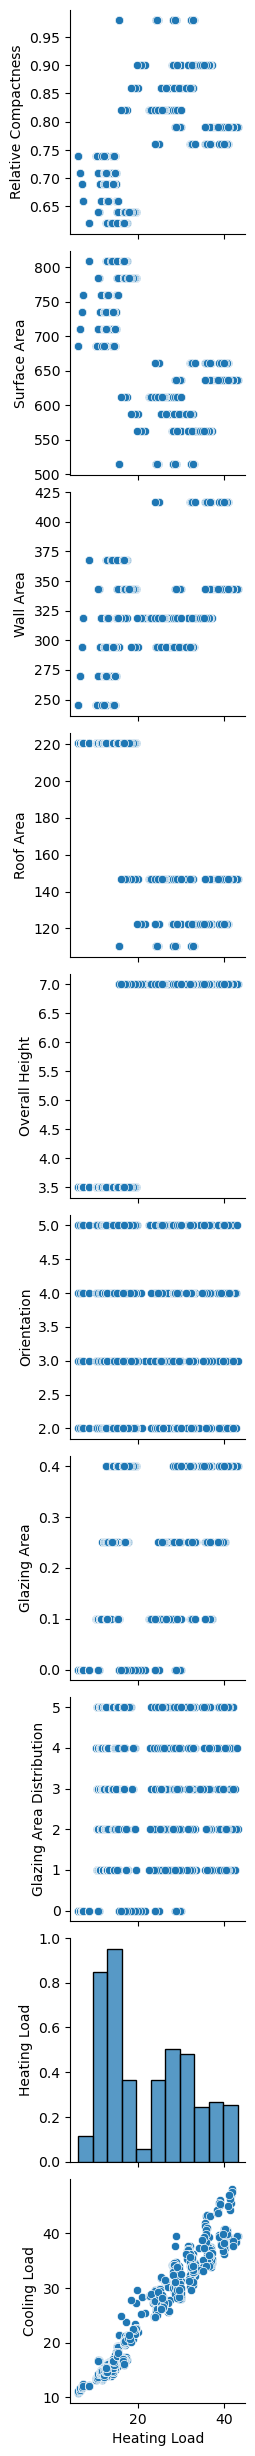

In [52]:
# Isolating the Heating Load column
heating_load = 'Heating Load'

# Generate a pair plot including only the target column with all others
sns.pairplot(eed_pd, x_vars = [heating_load], y_vars = eed_pd.columns, height = 2.5)

# Show the plot
plt.show()

In [53]:
# Data Standardization 
scaler = StandardScaler()

# Apply the standardization to the columns of the eed_pd dataset
eed_pd_standardized = pd.DataFrame(scaler.fit_transform(eed_pd), columns = eed_pd.columns)
eed_pd_standardized.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670115,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670115,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670115,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670115,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366


# **Guidelines**
## 1. Split the samples into 60% training, 20% validation, and 20% testing data at random


In [54]:
# Split the original dataset "eed_pd": 60% Training, 40% Remaining (Validation and Testing)
train_data, temp_data = train_test_split(eed_pd_standardized, test_size = 0.4, random_state = 10)

# Now split the "temp_data" or the 40% remainig data for validation and testing (20% each)
val_data, test_data = train_test_split(temp_data, test_size = 0.5, random_state = 10)

# Print size for each splitted data 
print(f"Original set size: {len(eed_pd_standardized)} samples")
print(f"Training set size:  {len(train_data)} samples")
print(f"Validation set size: {len(val_data)} samples")
print(f"Test set size: {len(test_data)} samples")


Original set size: 768 samples
Training set size:  460 samples
Validation set size: 154 samples
Test set size: 154 samples


#### From the original dataset that contains 768 samples, it is divided into three subsets: training, validation, and testing. The training data will be used primarily to help the algorithm in learning patterns and relationships in the data. The validation, these examples will be use to fine-tune the model and optimize its parameters. Improves  the model's performance on the problem without being part of the training data. Lastly, the testing data it serves as the final, unbiased evaluation to give an evaluation on the final model, this are set of unseen data after the model has been trained.

#### Furthermore, dividing the dataset into three parts avoids the probability of the model being overfitted. Overfitting is when the model is so complex that the model fits the dataset to closely and is sensitive to noise. However, maintaining a right amoung of data for training must be considered as well, if the training data is to little the model is classified as underfitting. Underfitted data is too simplistic to represent the underlying relationship in the dataset between the descriptive features and target predictions. 

## 2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)


In [ ]:
# from the training data
X_train = train_data.drop(columns=['Heating Load','Cooling Load'])
y1_train = train_data['Heating Load']

# from the validation data
X_val = val_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_val = val_data['Heating Load']

# from the test data
X_test = test_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_test = test_data['Heating Load']


# Define 10 different choices of regularization parameters (alphas)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

best_alpha = None
best_r2 = -float('inf')


# Store all the alpha and R2 values for printing later  
results = []

# Iterate over each alpha value to train the Ridge model
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    
    # Train the model using the training data
    ridge_model.fit(X_train, y1_train)
    
    # Predict the heating load for the validation set
    y1_val_pred = ridge_model.predict(X_val)
    
    # Calculate how accurate the predictions are using R² score
    r2_val = r2_score(y1_val, y1_val_pred)
    
    # Store the alpha and corresponding R² score
    results.append((alpha, r2_val))
    
    # Get the best alpha
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha

# Print all the alpha values and their corresponding R² scores
for alpha, r2 in results:
    print(f"Alpha: {alpha}, R² score: {r2:.6f}")

# Output the best alpha and corresponding R² score
print(f"Best alpha: {best_alpha} with R² score: {best_r2:.4f}")


Alpha: 1e-05, R² score: 0.902555
Alpha: 0.0001, R² score: 0.902555
Alpha: 0.001, R² score: 0.902555
Alpha: 0.01, R² score: 0.902552
Alpha: 0.1, R² score: 0.902523
Alpha: 1, R² score: 0.902015
Alpha: 5, R² score: 0.899238
Alpha: 50, R² score: 0.878324
Alpha: 100, R² score: 0.865027
Alpha: 500, R² score: 0.772414
Best alpha: 1e-05 with R² score: 0.9026


## 3. Make one final evaluation on the test data

In [56]:
# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y1_train_val = pd.concat([y1_train, y1_val])

# Train the final model using the best alpha and combined training + validation data
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y1_train_val)  # Train the model

# Predict the heating load on the test data
y1_test_pred = final_model.predict(X_test)

# Calculate the R² score for the test data
r2_test = r2_score(y1_test, y1_test_pred)

# Print the R² score for the test data
print(f"Final R² score on the test data: {r2_test:.4f}")


Final R² score on the test data: 0.9291


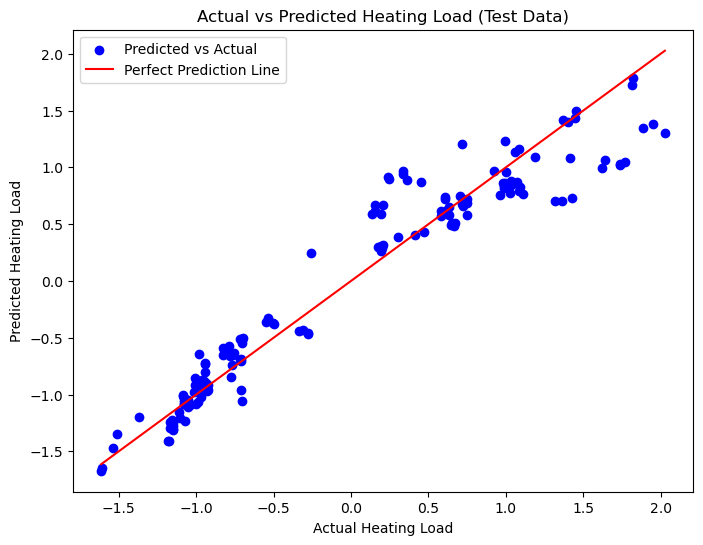

In [57]:
#  NOT SURE KUNG TAMA 'TO

#  Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted values
plt.scatter(y1_test, y1_test_pred, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line (y = x)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load (Test Data)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Transform the data back before being normalize
y = scaler.inverse_transform(eed_pd_standardized)

# Plot the Actual vs Predicted using the raw data



## 4. What are the best model's coefficients and intercepts, and its training, validation, and testing accuracy?

In [58]:
# 1. Get the model's coefficients and intercept
coefficients = final_model.coef_  # Coefficients of the features
intercept = final_model.intercept_  # Intercept term

print("Coefficients of the final model:", coefficients)
print("Intercept of the final model:", intercept)

# 2. Calculate R² score for training data
y1_train_val_pred = final_model.predict(X_train_val)  # Predict on the combined training + validation set
r2_train = r2_score(y1_train_val, y1_train_val_pred)
print(f"R² score on the training data (combined training + validation): {r2_train:.4f}")

# 3. Calculate R² score for the test data
y1_test_pred = final_model.predict(X_test)  # Predict on the test data
r2_test = r2_score(y1_test, y1_test_pred)
print(f"Final R² score on the test data: {r2_test:.4f}")

# 4. Print the validation R² score
print(f"Best R² score on the validation data: {best_r2:.4f}")


Coefficients of the final model: [-0.67783223 -0.37013853  0.07230664 -0.39585739  0.72138109 -0.00824845
  0.25907457  0.03736992]
Intercept of the final model: -0.0022864028660140624
R² score on the training data (combined training + validation): 0.9128
Final R² score on the test data: 0.9291
Best R² score on the validation data: 0.9026


## 5. What are the top 5 features among X1 to X8?

In [59]:
# Extract the coefficients of the trained model
coefficients = ridge_model.coef_.flatten()  # Flatten the coefficient array if it's in 2D

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients (importance)
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head()

# Print the top 5 features and their coefficients
print("Top 5 most important features for predicting Heating Load:")
print(top_features[['Feature', 'Coefficient']])

Top 5 most important features for predicting Heating Load:
          Feature  Coefficient
4  Overall Height     0.225579
3       Roof Area    -0.195911
2       Wall Area     0.186000
6    Glazing Area     0.125297
1    Surface Area    -0.108785


## We taught that there can be another appraoch for the programming assignment. Here is our another solution for the assignment. 


In [60]:
eed_pd1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


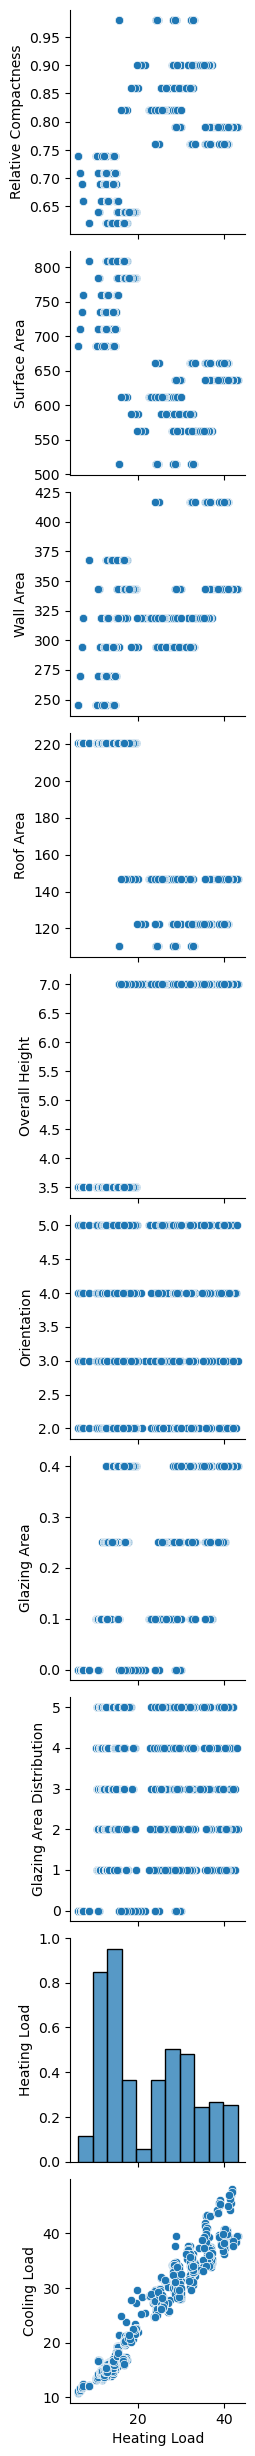

In [61]:
# Isolating the Heating Load column
heating_load = 'Heating Load'

# Generate a pair plot including only the target column with all others
sns.pairplot(eed_pd1, x_vars = [heating_load], y_vars = eed_pd.columns, height = 2.5)

# Show the plot
plt.show()

### From this pairplots, it an be observed that some of the characteristics listed has no direct corelation in predicting the heatind load of a building, We taught that dropping certain columns and mainting certain charactacteristics would help the models overall functionality, 


In [62]:
eed_pd1 = eed_pd1.drop(["Roof Area", "Orientation", "Glazing Area Distribution"], axis = 1)
eed_pd1.head()

,Relative Compactness,Surface Area,Wall Area,Overall Height,Glazing Area,Heating Load,Cooling Load
0,0.98,514.5,294.0,7.0,0.0,15.55,21.33
1,0.98,514.5,294.0,7.0,0.0,15.55,21.33
2,0.98,514.5,294.0,7.0,0.0,15.55,21.33
3,0.98,514.5,294.0,7.0,0.0,15.55,21.33
4,0.90,563.5,318.5,7.0,0.0,20.84,28.28


In [63]:
# Data Standardization 
scaler = StandardScaler()

# Apply the standardization to the columns of the eed_pd dataset
eed_pd1_standardized = pd.DataFrame(scaler.fit_transform(eed_pd1), columns = eed_pd1.columns)
eed_pd1_standardized.head()

,Relative Compactness,Surface Area,Wall Area,Overall Height,Glazing Area,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,1.0,-1.760447,-0.670115,-0.342666
1,2.041777,-1.785875,-0.561951,1.0,-1.760447,-0.670115,-0.342666
2,2.041777,-1.785875,-0.561951,1.0,-1.760447,-0.670115,-0.342666
3,2.041777,-1.785875,-0.561951,1.0,-1.760447,-0.670115,-0.342666
4,1.284979,-1.229239,0.000000,1.0,-1.760447,-0.145503,0.388366


In [64]:
# Split the original dataset "eed_pd": 60% Training, 40% Remaining (Validation and Testing)
train_data, temp_data = train_test_split(eed_pd1_standardized, test_size = 0.4, random_state = 10)

# Now split the "temp_data" or the 40% remainig data for validation and testing (20% each)
val_data, test_data = train_test_split(temp_data, test_size = 0.5, random_state = 10)

# Print size for each splitted data 
print(f"Original set size: {len(eed_pd_standardized)} samples")
print(f"Training set size:  {len(train_data)} samples")
print(f"Validation set size: {len(val_data)} samples")
print(f"Test set size: {len(test_data)} samples")

Original set size: 768 samples
Training set size:  460 samples
Validation set size: 154 samples
Test set size: 154 samples


In [65]:
# from the training data
X_train = train_data.drop(columns=['Heating Load','Cooling Load'])
y1_train = train_data['Heating Load']

# from the validation data
X_val = val_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_val = val_data['Heating Load']

# from the test data
X_test = test_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_test = test_data['Heating Load']


# Define 10 different choices of regularization parameters (alphas)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

best_alpha = None
best_r2 = -float('inf')


# Store all the alpha and R2 values for printing later
results = []

# Iterate over each alpha value to train the Ridge model
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    
    # Train the model using the training data
    ridge_model.fit(X_train, y1_train)
    
    # Predict the heating load for the validation set
    y1_val_pred = ridge_model.predict(X_val)
    
    # Calculate how accurate the predictions are using R² score
    r2_val = r2_score(y1_val, y1_val_pred)
    
    # Store the alpha and corresponding R² score
    results.append((alpha, r2_val))
    
    # Get the best alpha
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha

# Print all the alpha values and their corresponding R² scores
for alpha, r2 in results:
    print(f"Alpha: {alpha}, R² score: {r2:.6f}")

# Output the best alpha and corresponding R² score
print(f"Best alpha: {best_alpha} with R² score: {best_r2:.4f}")

Alpha: 1e-05, R² score: 0.900030
Alpha: 0.0001, R² score: 0.900030
Alpha: 0.001, R² score: 0.900030
Alpha: 0.01, R² score: 0.900029
Alpha: 0.1, R² score: 0.900006
Alpha: 1, R² score: 0.899401
Alpha: 5, R² score: 0.896624
Alpha: 50, R² score: 0.877346
Alpha: 100, R² score: 0.862674
Alpha: 500, R² score: 0.739549
Best alpha: 1e-05 with R² score: 0.9000


In [66]:
# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y1_train_val = pd.concat([y1_train, y1_val])

# Train the final model using the best alpha and combined training + validation data
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y1_train_val)  # Train the model

# Predict the heating load on the test data
y1_test_pred = final_model.predict(X_test)

# Calculate the R² score for the test data
r2_test = r2_score(y1_test, y1_test_pred)

# Print the R² score for the test data
print(f"Final R² score on the test data: {r2_test:.4f}")

Final R² score on the test data: 0.9302


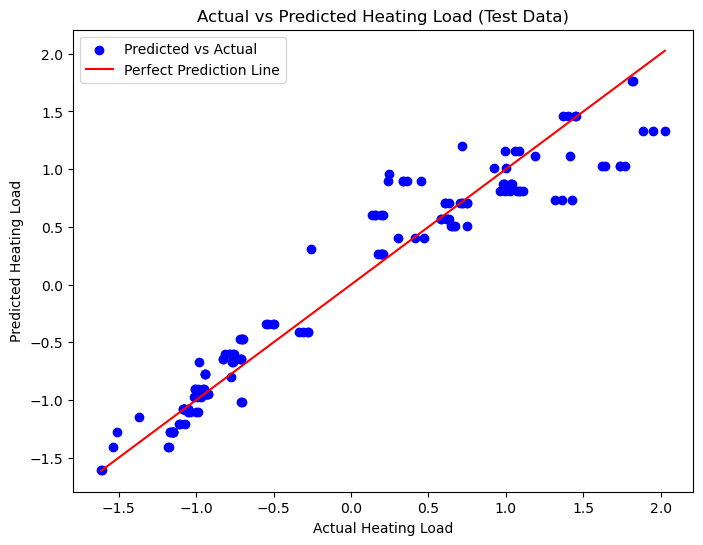

In [67]:
#  NOT SURE KUNG TAMA 'TO

#  Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted values
plt.scatter(y1_test, y1_test_pred, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line (y = x)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load (Test Data)')
plt.legend()

# Show the plot
plt.show()

In [68]:
# 1. Get the model's coefficients and intercept
coefficients = final_model.coef_  # Coefficients of the features
intercept = final_model.intercept_  # Intercept term

print("Coefficients of the final model:", coefficients)
print("Intercept of the final model:", intercept)

# 2. Calculate R² score for training data
y1_train_val_pred = final_model.predict(X_train_val)  # Predict on the combined training + validation set
r2_train = r2_score(y1_train_val, y1_train_val_pred)
print(f"R² score on the training data (combined training + validation): {r2_train:.4f}")

# 3. Calculate R² score for the test data
y1_test_pred = final_model.predict(X_test)  # Predict on the test data
r2_test = r2_score(y1_test, y1_test_pred)
print(f"Final R² score on the test data: {r2_test:.4f}")

# 4. Print the validation R² score
print(f"Best R² score on the validation data: {best_r2:.4f}")


Coefficients of the final model: [-0.67897878 -0.75664681  0.26381143  0.72132676  0.2684662 ]
Intercept of the final model: -0.0019756716852254302
R² score on the training data (combined training + validation): 0.9114
Final R² score on the test data: 0.9302
Best R² score on the validation data: 0.9000


In [69]:
# Extract the coefficients of the trained model
coefficients = ridge_model.coef_.flatten()  # Flatten the coefficient array if it's in 2D

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients (importance)
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head()

# Print the top 5 features and their coefficients
print("Top 5 most important features for predicting Heating Load:")
print(top_features[['Feature', 'Coefficient']])

Top 5 most important features for predicting Heating Load:
                Feature  Coefficient
3        Overall Height     0.278675
2             Wall Area     0.216862
1          Surface Area    -0.151232
4          Glazing Area     0.129492
0  Relative Compactness     0.128529
